In [1]:
import gator
import matplotlib.pyplot as plt
import multipsi as mtp
import numpy as np
import py3Dmol as p3d
import veloxchem as vlx
from matplotlib import gridspec
from scipy.interpolate import interp1d

# au to eV conversion factor
au2ev = 27.211386

In [2]:
water_mol_str = """
O       0.0000000000     0.1178336003     0.0000000000
H      -0.7595754146    -0.4713344012     0.0000000000
H       0.7595754146    -0.4713344012     0.0000000000 
"""

viewer = p3d.view(width=400, height=300)
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.addModel("3\n" + water_mol_str)
viewer.setStyle({"stick": {}})
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
# Prepare molecule and basis objects
molecule = vlx.Molecule.read_molecule_string(water_mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

# SCF settings and calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_settings = {"conv_thresh": 1.0e-6}
method_settings = {"xcfun": "b3lyp"}
scf_drv.update_settings(scf_settings, method_settings)
scf_results = scf_drv.compute(molecule, basis)

# resolve four eigenstates
rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
rpa_solver.update_settings({"nstates": 6}, method_settings)
rpa_results = rpa_solver.compute(molecule, basis, scf_results)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Molecular grid with 40792 points generated in 0.02 sec.                                                          
                                                                                                                          
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205311 a.u. Time: 0.03 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -76.384872592259    0.0000000000      0.05814060      0.01079184      0.00000000                


                  2       -76.384686594376    0.0001859979      0.07420221      0.01375784      0.03127402                


                  3       -76.385180742153   -0.0004941478      0.00038519      0.00008834      0.01650959                


                  4       -76.385180774173   -0.0000000320      0.00007657      0.00002027      0.00029092                


                  5       -76.385180774932   -0.0000000008      0.00000194      0.00000051      0.00002929                


                  6       -76.385180774934   -0.0000000000      0.00000014      0.00000003      0.00000214                


                                                                                                                          
               *** SCF converged in 6 iterations. Time: 0.15 sec.                                                         
                                                                                                                          


               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :      -76.3851807749 a.u.                                              
               Electronic Energy                  :      -85.5413254944 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001389 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.968145 a.u.        -2.460780 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.968145 a.u.         2.460780 Debye                                     
                

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 6                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                               Exchange-Correlation Functional : B3LYP                                                    
                

* Info * Using the B3LYP functional.                                                                                      
                                                                                                                          
         P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
                                                                                                                          
* Info * Using the Libxc library (v7.0.0).                                                                                
                                                                                                                          
         S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
                                                                                                                          
* Info * Using the following algorithm for XC numer

* Info * Molecular grid with 40792 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 6 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 12.42 kB of memory used for subspace procedure on the master node                                                
* Info * 2.21 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 7.22e-01 and 6.04e-02                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 20.10 kB of memory used for subspace procedure on the master node                                                
* Info * 2.21 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 4.84e-02 and 7.43e-04                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 18 gerade trial vectors in reduced space                                                                         
* Info * 18 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 27.82 kB of memory used for subspace procedure on the master node                                                
* Info * 2.21 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 3.75e-03 and 8.17e-06                                            
                

* Info * Processing 5 Fock builds...                                                                                      


                                                                                                                          
* Info * 23 gerade trial vectors in reduced space                                                                         
* Info * 23 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 34.22 kB of memory used for subspace procedure on the master node                                                
* Info * 2.21 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 1.52e-04 and 4.10e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 24 gerade trial vectors in reduced space                                                                         
* Info * 24 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 35.46 kB of memory used for subspace procedure on the master node                                                
* Info * 2.21 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 1.55e-05 and 4.10e-06                                            
                

               *** Linear response converged in 5 iterations. Time: 0.44 sec                                              
                                                                                                                          
                                                                                                                          


               Electric Transition Dipole Moments (dipole length, a.u.)                                                   
               --------------------------------------------------------                                                   
                                                X            Y            Z                                               
               Excited State    S1:     -0.000000    -0.000000     0.243207                                               
               Excited State    S2:     -0.000000     0.630802    -0.000000                                               
               Excited State    S3:      0.000000    -0.000000    -0.000000                                               
               Excited State    S4:     -0.535698    -0.000000    -0.000000                                               
               Excited State    S5:      1.075243    -0.000000    -0.000000                                               
               E

               Electric Transition Dipole Moments (dipole velocity, a.u.)                                                 
               ----------------------------------------------------------                                                 
                                                X            Y            Z                                               
               Excited State    S1:      0.000000     0.000000     0.458646                                               
               Excited State    S2:     -0.000000     0.838675    -0.000000                                               
               Excited State    S3:      0.000000    -0.000000    -0.000000                                               
               Excited State    S4:     -0.612311    -0.000000    -0.000000                                               
               Excited State    S5:      1.040765    -0.000000    -0.000000                                               
               E

               Magnetic Transition Dipole Moments (a.u.)                                                                  
               -----------------------------------------                                                                  
                                                X            Y            Z                                               
               Excited State    S1:     -0.120410    -0.000000     0.000000                                               
               Excited State    S2:     -0.000000    -0.000000     0.000000                                               
               Excited State    S3:      0.000000    -0.175860    -0.000000                                               
               Excited State    S4:     -0.000000    -0.000000     0.207108                                               
               Excited State    S5:      0.000000     0.000000     0.040413                                               
               E

               One-Photon Absorption                                                                                      
               ---------------------                                                                                      
               Excited State    S1:      0.28615365 a.u.      7.78664 eV    Osc.Str.    0.0113                            
               Excited State    S2:      0.36383134 a.u.      9.90036 eV    Osc.Str.    0.0965                            
               Excited State    S3:      0.36445906 a.u.      9.91744 eV    Osc.Str.    0.0000                            
               Excited State    S4:      0.45391821 a.u.     12.35174 eV    Osc.Str.    0.0868                            
               Excited State    S5:      0.54044302 a.u.     14.70620 eV    Osc.Str.    0.4166                            
               Excited State    S6:      0.66642151 a.u.     18.13425 eV    Osc.Str.    0.2438                            
                

               Electronic Circular Dichroism                                                                              
               -----------------------------                                                                              
               Excited State    S1:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S2:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S3:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S4:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S5:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S6:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
                

               Character of excitations:                                                                                  
                                                                                                                          
               Excited state 1                                                                                            
               ---------------                                                                                            
               HOMO     -> LUMO         1.0001                                                                            
                                                                                                                          
               Excited state 2                                                                                            
               ---------------                                                                                            
               H

Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)
   0.286      0.01128  -0.00000  -0.00000   0.24321
   0.364      0.09652  -0.00000   0.63080  -0.00000
   0.364      0.00000   0.00000  -0.00000  -0.00000
   0.454      0.08684  -0.53570  -0.00000  -0.00000
   0.540      0.41655   1.07524  -0.00000  -0.00000
   0.666      0.24377   0.00000   0.74073  -0.00000


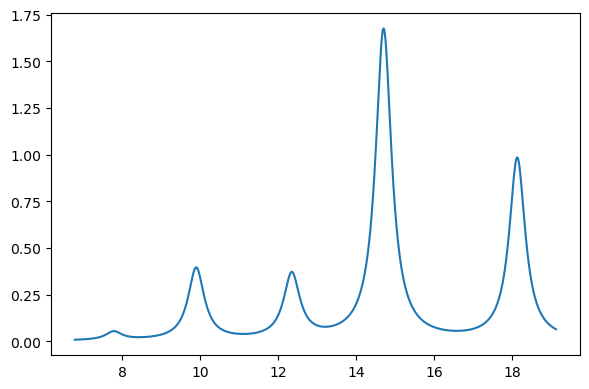

In [4]:
def lorentzian(x, y, xmin, xmax, xstep, gamma):
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)):
            yi[i] = yi[i] + y[k] * (gamma / 2.0) / (
                (xi[i] - x[k]) ** 2 + (gamma / 2.0) ** 2
            )
    return xi, yi


# Print results as a table
print("Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)")
for i in np.arange(len(rpa_results["eigenvalues"])):
    e, os, x, y, z = (
        rpa_results["eigenvalues"][i],
        rpa_results["oscillator_strengths"][i],
        rpa_results["electric_transition_dipoles"][i][0],
        rpa_results["electric_transition_dipoles"][i][1],
        rpa_results["electric_transition_dipoles"][i][2],
    )
    print("   {:.3f}     {:8.5f}  {:8.5f}  {:8.5f}  {:8.5f}".format(e, os, x, y, z))

plt.figure(figsize=(6, 4))
x = au2ev * rpa_results["eigenvalues"]
y = rpa_results["oscillator_strengths"]
xi, yi = lorentzian(x, y, min(x) - 1.0, max(x) + 1.0, 0.01, 0.5)
plt.plot(xi, yi)
plt.tight_layout()
plt.show()

In [5]:
# Define spectrum region to be resolved
xmin, xmax = 7.0, 17.0
freqs = np.arange(xmin, xmax, 0.1) / au2ev
freqs_str = [str(x) for x in freqs]

# Calculate the response
cpp_drv = vlx.rsplinabscross.LinearAbsorptionCrossSection(
    {"frequencies": ",".join(freqs_str), "damping": 0.3 / au2ev}, method_settings
)
cpp_drv.init_driver()
cpp_results = cpp_drv.compute(molecule, basis, scf_results)

# Extract the imaginary part of the complex response function and convert to absorption cross section
sigma = []
for w in freqs:
    axx = -cpp_drv.rsp_property["response_functions"][("x", "x", w)].imag
    ayy = -cpp_drv.rsp_property["response_functions"][("y", "y", w)].imag
    azz = -cpp_drv.rsp_property["response_functions"][("z", "z", w)].imag
    alpha_bar = (axx + ayy + azz) / 3.0
    sigma.append(4.0 * np.pi * w * alpha_bar / 137.035999)

                                                                                                                          
                                              Complex Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 100                                                      
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                               Exchange-Correlation Functional : B3LYP                                                    
                

* Info * Using the B3LYP functional.                                                                                      
                                                                                                                          
         P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
                                                                                                                          
* Info * Using the Libxc library (v7.0.0).                                                                                
                                                                                                                          
         S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
                                                                                                                          
* Info * Using the following algorithm for XC numer

* Info * Molecular grid with 40792 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Processing 14 Fock builds...                                                                                     


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 14 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 582.15 kB of memory used for subspace procedure on the master node                                               
* Info * 2.27 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 5.84e-01 and 4.08e-02                                            
                

* Info * Processing 13 Fock builds...                                                                                     


                                                                                                                          
* Info * 25 gerade trial vectors in reduced space                                                                         
* Info * 27 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 598.79 kB of memory used for subspace procedure on the master node                                               
* Info * 2.28 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 2.13e-02 and 3.61e-04                                            
                

* Info * Processing 24 Fock builds...                                                                                     


                                                                                                                          
* Info * 32 gerade trial vectors in reduced space                                                                         
* Info * 51 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 619.78 kB of memory used for subspace procedure on the master node                                               
* Info * 2.31 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 2.71e-04 and 1.86e-13                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 33 gerade trial vectors in reduced space                                                                         
* Info * 52 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 619.91 kB of memory used for subspace procedure on the master node                                               
* Info * 2.31 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 9.82e-05 and 1.86e-13                                            
                

               *** Complex response converged in 4 iterations. Time: 2.18 sec                                             
                                                                                                                          
                                                                                                                          


               Response Functions at Given Frequencies                                                                    
                                                                                                                          
               Dipole  Dipole   Frequency            Real        Imaginary                                                
               -----------------------------------------------------------                                                
               <<  x  ;  x  >>     0.2572     -8.93701451     -0.21925610j                                                
               <<  x  ;  y  >>     0.2572      0.00000000      0.00000000j                                                
               <<  x  ;  z  >>     0.2572      0.00000000      0.00000000j                                                
               <<  y  ;  x  >>     0.2572      0.00000000      0.00000000j                                                
               <

               <<  x  ;  y  >>     0.4851      0.00000000     -0.00000000j                                                
               <<  x  ;  z  >>     0.4851      0.00000000      0.00000000j                                                
               <<  y  ;  x  >>     0.4851      0.00000000     -0.00000000j                                                
               <<  y  ;  y  >>     0.4851     -1.87317101     -0.47656998j                                                
               <<  y  ;  z  >>     0.4851     -0.00000000      0.00000000j                                                
               <<  z  ;  x  >>     0.4851      0.00000000      0.00000000j                                                
               <<  z  ;  y  >>     0.4851     -0.00000000      0.00000000j                                                
               <<  z  ;  z  >>     0.4851     -0.99170796     -0.02327138j                                                
                

               Linear Absorption Cross-Section                                                                            
                                                                                                                          
               Reference: J. Kauczor and P. Norman, J. Chem. Theory Comput. 2014, 10, 2449-2455.                          
                                                                                                                          
               Frequency[a.u.]     Frequency[eV]        sigma(w)[a.u.]                                                    
               -------------------------------------------------------                                                    
               0.2572              7.00000                0.01025938                                                      
               0.2609              7.10000                0.01211955                                                      
               0

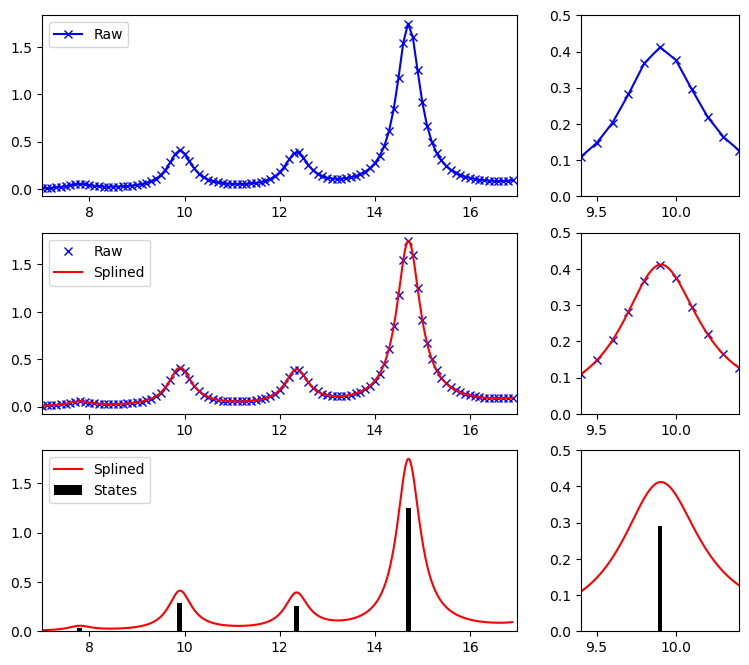

In [6]:
# Make figure with panels of 3:1 width
plt.figure(figsize=(9, 8))
gs = gridspec.GridSpec(3, 2, width_ratios=[3, 1])

# Raw results for the full region
plt.subplot(gs[0])
plt.plot(au2ev * freqs, sigma, "bx-")
plt.legend(("Raw", ""), loc="upper left")
plt.xlim((xmin, xmax))

# Raw results for a zoomed in region
plt.subplot(gs[1])
plt.plot(au2ev * freqs, sigma, "bx-")
plt.xlim((9.4, 10.4))
plt.ylim((0, 0.50))

# Raw and splined spectra for the full region
plt.subplot(gs[2])
plt.plot(au2ev * freqs, sigma, "bx")
x = np.arange(min(au2ev * freqs), max(au2ev * freqs), 0.01)
y = interp1d(au2ev * freqs, sigma, kind="cubic")
plt.plot(x, y(x), "r")
plt.legend(("Raw", "Splined"), loc="upper left")
plt.xlim((xmin, xmax))

# Zoomed in raw and splined spectra
plt.subplot(gs[3])
plt.plot(au2ev * freqs, sigma, "bx")
plt.plot(x, y(x), "r")
plt.xlim((9.4, 10.4))
plt.ylim((0, 0.50))

# Zoomed in raw and splined spectra for the full region
plt.subplot(gs[4])
x = np.arange(min(au2ev * freqs), max(au2ev * freqs), 0.01)
y = interp1d(au2ev * freqs, sigma, kind="cubic")
plt.plot(x, y(x), "r")
xi = au2ev * rpa_results["eigenvalues"]
yi = rpa_results["oscillator_strengths"]
plt.bar(xi, 3.0 * yi, width=0.1, color="k")
plt.legend(("Splined", "States"), loc="upper left")
plt.xlim((xmin, xmax))

# Zoomed in raw and splined spectra
plt.subplot(gs[5])
plt.plot(x, y(x), "r")
plt.bar(xi, 3.0 * yi, width=0.025, color="k")
plt.xlim((9.4, 10.4))
plt.ylim((0, 0.50))

plt.show()

In [7]:
# Construct structure and basis objects
molecule = gator.get_molecule(water_mol_str)
basis = gator.get_molecular_basis(molecule, "6-31G")

# Perform SCF calculation
scf_gs = gator.run_scf(molecule, basis)

# Calculate the 6 lowest eigenstates
adc_results = gator.run_adc(molecule, basis, scf_gs, method="adc3", singlets=6)

* Info * Reading basis set from file: /Users/golo.dusanka/miniconda3/envs/echem/lib/python3.12/site-packages/veloxchem/basis/6-31G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: 6-31G                                                                               
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
        

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205311 a.u. Time: 0.10 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -75.983870373953    0.0000000000      0.00006826      0.00001638      0.00000000                


                  2       -75.983870375702   -0.0000000017      0.00002636      0.00000475      0.00006304                


                  3       -75.983870375765   -0.0000000001      0.00000396      0.00000061      0.00000524                


                  4       -75.983870375769   -0.0000000000      0.00000029      0.00000008      0.00000296                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.05 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -75.9838703758 a.u.                                              
               Electronic Energy                  :      -85.1400150952 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002874 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -1.036166 a.u.        -2.633670 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         1.036166 a.u.         2.633670 Debye                                     
                

SCF converged in 4 iterations.
Total Energy: -75.9838703758 au


/Users/golo.dusanka/miniconda3/envs/echem/lib/python3.12/site-packages/adcc/misc.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Starting adc3 singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values


  1    12       0.15686  261ms  [0.39139529 0.47650984 0.49094138 0.57574508 0.62906502 0.76698694]


  2    24     0.0079564  679ms  [0.31545297 0.39679964 0.40998243 0.4970394  0.56884827 0.70198492]


  3    36    0.00056412  802ms  [0.3128226  0.39358839 0.40590815 0.49200391 0.56576577 0.69812217]


  4    48    6.6388e-05  804ms  [0.31271795 0.3934001  0.40568027 0.49168013 0.5655336  0.69778162]


  5    60    1.1005e-05   1.1s  [0.31271345 0.39338801 0.4056698  0.49165875 0.56551124 0.69772592]
=== Restart ===


  6    24    2.2941e-06   1.2s  [0.31271337 0.39338773 0.40566941 0.49165799 0.56550977 0.69771712]


  7    36    5.5272e-07  722ms  [0.31271337 0.39338772 0.40566937 0.49165793 0.56550957 0.69771518]
=== Converged ===
    Number of matrix applies:    84
    Total solver time:             5s 563ms


+--------------------------------------------------------------+
| adc3 (adc2)                             singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.3127134      8.509364   0.0134     0.951   0.04895  |
|  1     0.3933877      10.70463   0.0000    0.9532   0.04681  |
|  2     0.4056694      11.03883   0.1161    0.9491   0.05091  |
|  3     0.4916579      13.37869   0.1103     0.949   0.05096  |
|  4     0.5655096       15.3883   0.4351    0.9625   0.03751  |
|  5     0.6977152       18.9858   0.2604    0.9537   0.04626  |
+--------------------------------------------------------------+



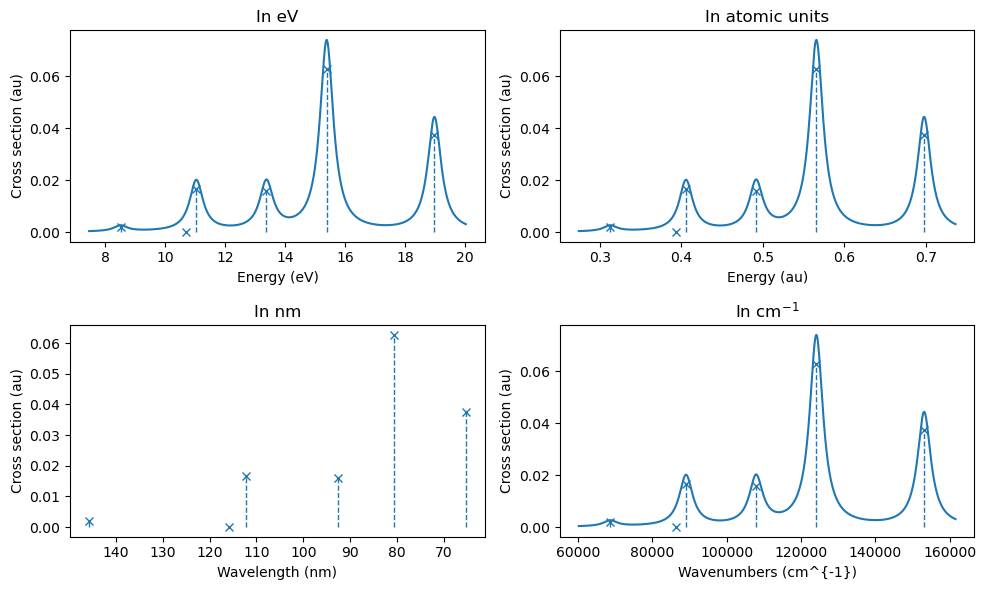

In [8]:
# Print information on eigenstates
print(adc_results.describe())

# Plot using built-in functionalities
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title("In eV")
adc_results.plot_spectrum(xaxis="eV")

plt.subplot(222)
plt.title("In atomic units")
adc_results.plot_spectrum(xaxis="au")

plt.subplot(223)
plt.title("In nm")
adc_results.plot_spectrum(xaxis="nm", broadening=None)

plt.subplot(224)
plt.title(r"In cm$^{-1}$")
adc_results.plot_spectrum(xaxis="cm-1")
plt.tight_layout()
plt.show()

In [9]:
# Prepare molecule and basis objects
molecule = vlx.Molecule.read_molecule_string(water_mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

# SCF calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205311 a.u. Time: 0.04 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -75.983870373953    0.0000000000      0.00006826      0.00001638      0.00000000                


                  2       -75.983870375702   -0.0000000017      0.00002636      0.00000475      0.00006304                


                  3       -75.983870375765   -0.0000000001      0.00000396      0.00000061      0.00000524                


                  4       -75.983870375769   -0.0000000000      0.00000029      0.00000008      0.00000296                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.03 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -75.9838703758 a.u.                                              
               Electronic Energy                  :      -85.1400150952 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002874 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -1.036166 a.u.        -2.633670 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         1.036166 a.u.         2.633670 Debye                                     
                

In [10]:
# Active space settings
space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.cas(6, 5)  # 3 O_2p and 2 H_1s

# CASSCF calculation
mcscf_drv = mtp.McscfDriver()
mcscf_results = mcscf_drv.compute(molecule, basis, space, 6)

# Transition properties
SI = mtp.StateInteraction()
si_results = SI.compute(molecule, basis, mcscf_results)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 2
               Number of active orbitals:              5
               Number of virtual orbitals:             6

               This is a CASSCF wavefunction: CAS(6,5)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   6
 

        1     -75.617648941     0.0e+00      9.7e-02          0        0.40    0:00:00


        2     -75.642903350    -2.5e-02      1.4e-02          0        0.40    0:00:00


        3     -75.646125925    -3.2e-03      1.6e-04          0        0.40    0:00:00


        4     -75.646212175    -8.6e-05      3.4e-06          0        0.40    0:00:00


        5     -75.646218727    -6.6e-06      5.4e-07          0        0.48    0:00:00


        6     -75.646219045    -3.2e-07      1.8e-08          0        0.58    0:00:00


        7     -75.646219063    -1.8e-08      9.0e-10          0        0.58    0:00:00


        8     -75.646219065    -1.9e-09      1.0e-10          0        0.69    0:00:00
** Convergence reached in 8 iterations


        9     -75.646219065    -5.3e-11      3.7e-12          0        0.69    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.98281062496527
  - Natural orbitals
1.98486 1.99960 1.99160 0.00851 0.01544
                                                                                                                          
* State 2
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -75.70404926196629
  - Natural orbitals
1.98828 1.00000 1.99728 0.99912 0.01531
                                                                                                                          
* State 3
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -75.62045

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.848594 a.u.        -2.156911 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.848594 a.u.         2.156911 Debye                                     
                

                                                                                                                          
                                                Dipole moment for state 2                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.088075 a.u.         0.223865 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.088075 a.u.         0.223865 Debye                                     
                

                                                                                                                          
                                                Dipole moment for state 3                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.019117 a.u.        -0.048591 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.019117 a.u.         0.048591 Debye                                     
                

                                                                                                                          
                                                Dipole moment for state 4                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.127030 a.u.         0.322878 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.127030 a.u.         0.322878 Debye                                     
                

                                                                                                                          
                                                Dipole moment for state 5                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.138716 a.u.         0.352582 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.138716 a.u.         0.352582 Debye                                     
                

                                                                                                                          
                                                Dipole moment for state 6                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.255728 a.u.        -0.649995 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.255728 a.u.         0.649995 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        7.58548         1.220177e-02    2.799370e-02
     1       4       10.35557         1.097829e-01    1.281789e-01
     1       5       12.59260         1.545515e-01    1.469851e-01
     1       6       14.56079         5.993553e-01    3.307390e-01
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 c

Energy [au]  Osc. str.
   0.279      0.01220
   0.362      0.00000
   0.381      0.10978
   0.463      0.15455
   0.535      0.59936


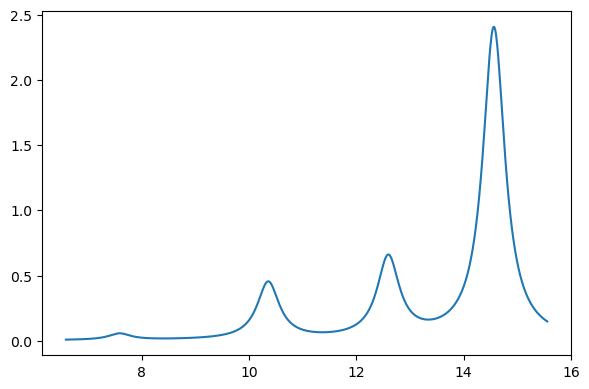

In [11]:
# Print results as a table
print("Energy [au]  Osc. str.")
for i in np.arange(len(si_results["energies"])):
    e, os = (
        si_results["energies"][i],
        si_results["oscillator_strengths"][i],
    )
    print("   {:.3f}     {:8.5f}".format(e, os))

plt.figure(figsize=(6, 4))
x = au2ev * np.array(si_results["energies"])
y = si_results["oscillator_strengths"]
xi, yi = lorentzian(x, y, min(x) - 1.0, max(x) + 1.0, 0.01, 0.5)
plt.plot(xi, yi)
plt.tight_layout()
plt.show()

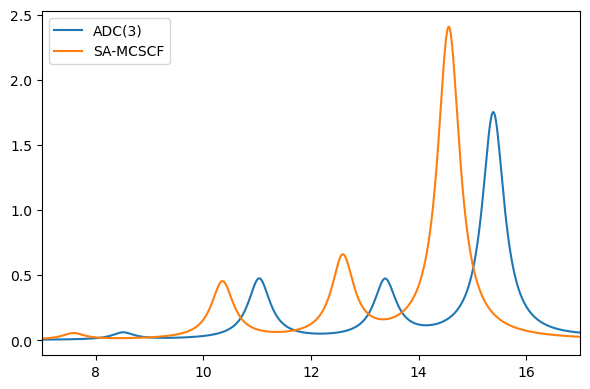

In [12]:
plt.figure(figsize=(6, 4))

# ADC(3)
x, y = au2ev * adc_results.excitation_energy, adc_results.oscillator_strength
xi, yi = lorentzian(x, y, xmin, xmax, 0.01, 0.5)
plt.plot(xi, yi)

# SA-MCSCF
x = au2ev * np.array(si_results["energies"])
y = si_results["oscillator_strengths"]
xi, yi = lorentzian(x, y, xmin, xmax, 0.01, 0.5)
plt.plot(xi, yi)
plt.legend(("ADC(3)", "SA-MCSCF"))
plt.xlim((xmin, xmax))
plt.tight_layout()
plt.show()

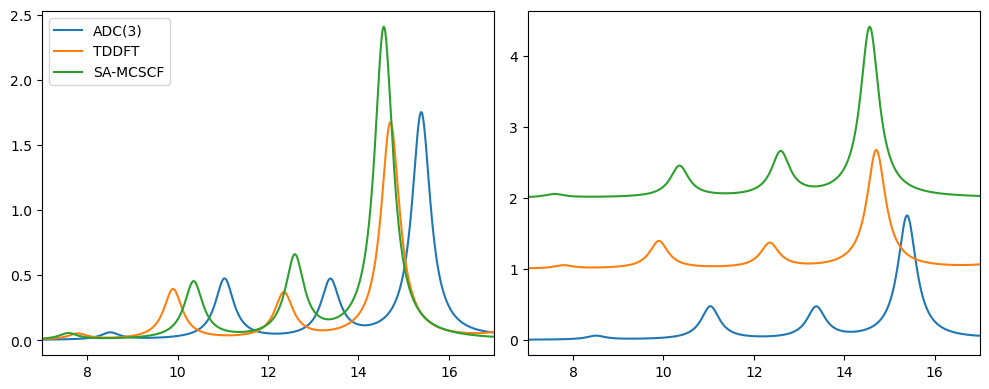

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)

xmin, xmax = 7, 17

# ADC(3)
x, y = au2ev * adc_results.excitation_energy, adc_results.oscillator_strength
xi, yi = lorentzian(x, y, xmin, xmax, 0.01, 0.5)
ax1.plot(xi, yi)
ax2.plot(xi, yi)

# TDDFT
x = au2ev * rpa_results["eigenvalues"]
y = rpa_results["oscillator_strengths"]
xi, yi = lorentzian(x, y, xmin, xmax, 0.01, 0.5)
ax1.plot(xi, yi)
ax2.plot(xi, yi + 1)

# SA-MCSCF
x = au2ev * np.array(si_results["energies"])
y = si_results["oscillator_strengths"]
xi, yi = lorentzian(x, y, xmin, xmax, 0.01, 0.5)
ax1.plot(xi, yi)
ax2.plot(xi, yi + 2)

ax1.legend(("ADC(3)", "TDDFT", "SA-MCSCF"))
ax1.set_xlim((xmin, xmax))
ax2.set_xlim((xmin, xmax))
plt.tight_layout()
plt.show()